In [9]:
 ! pip install -q kaggle

 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sathwik01234","key":"12924921058e8740328a25ccd80d9078"}'}

In [10]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [11]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [12]:
 ! kaggle datasets list

ref                                                                 title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                            29MB  2023-11-16 01:38:36           1928        190  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data                    763KB  2023-11-21 17:56:32           8587        151  1.0              
thedevastator/books-sales-and-ratings                               Books Sales and Ratings                           53KB  2023-12-06 04:54:33           2006         29  1.0              
thedrcat/daigt-proper-train-dataset                    

In [13]:
!kaggle datasets download -d emmarex/plantdisease

 98% 643M/658M [00:04<00:00, 214MB/s]
100% 658M/658M [00:04<00:00, 164MB/s]


In [15]:
import zipfile
with zipfile.ZipFile('/content/plantdisease.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras


In [17]:
path = '/content/PlantVillage'
train_ds , test_ds = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)


Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Using 4127 files for validation.


In [18]:
classes = train_ds.class_names
classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

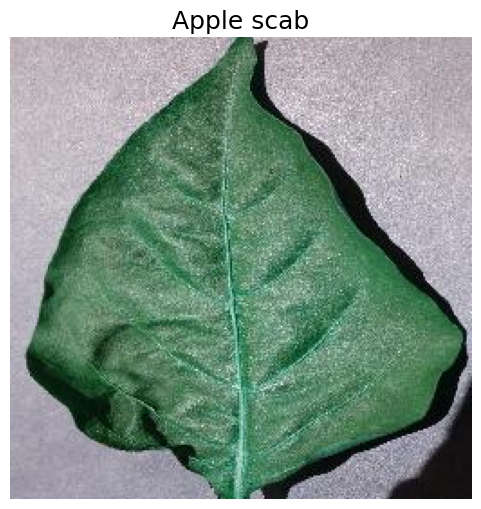

In [19]:
image = cv2.imread("/content/PlantVillage/Pepper__bell___healthy/00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

----------------------------------

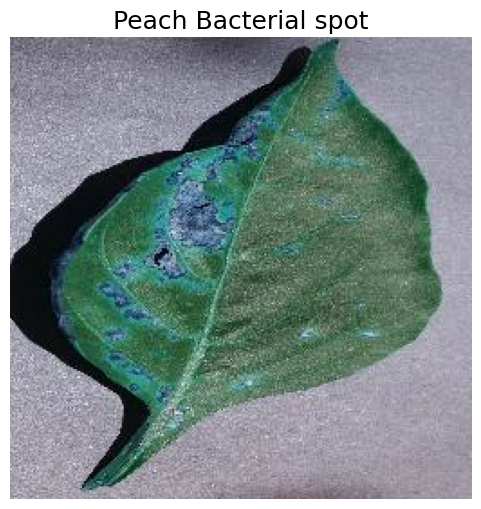

In [20]:
image = cv2.imread("/content/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Peach Bacterial spot',size =18 )
plt.axis('off')
plt.show()

-----------------------------

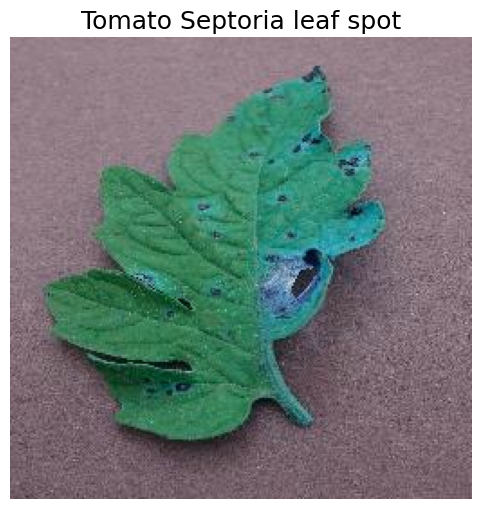

In [21]:
image = cv2.imread("/content/PlantVillage/Tomato_Septoria_leaf_spot/002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Septoria leaf spot',size =18 )
plt.axis('off')
plt.show()

In [22]:

model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

In [23]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [26]:
history = model.fit(train_ds , epochs = 7)

Epoch 1/7
516/516 [==============================] - 1745s 3s/step - loss: 1.5026 - accuracy: 0.5115
Epoch 2/7
516/516 [==============================] - 1728s 3s/step - loss: 0.7061 - accuracy: 0.7571
Epoch 3/7
516/516 [==============================] - 1708s 3s/step - loss: 0.4687 - accuracy: 0.8417
Epoch 4/7
516/516 [==============================] - 1690s 3s/step - loss: 0.3440 - accuracy: 0.8810
Epoch 5/7
516/516 [==============================] - 1644s 3s/step - loss: 0.2804 - accuracy: 0.9017
Epoch 6/7
516/516 [==============================] - 1650s 3s/step - loss: 0.2330 - accuracy: 0.9171
Epoch 7/7
516/516 [==============================] - 1627s 3s/step - loss: 0.1886 - accuracy: 0.9340


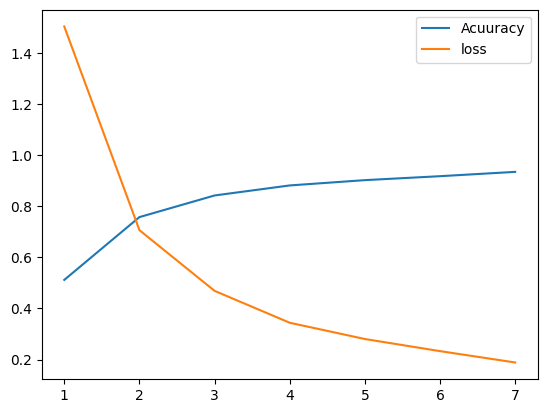

In [28]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,8)

plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()

In [29]:
model.evaluate(test_ds)

129/129 [==============================] - 124s 961ms/step - loss: 0.2764 - accuracy: 0.9082


[0.2764381468296051, 0.9081657528877258]

In [30]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image

1/1 [==============================] - 0s 41ms/step


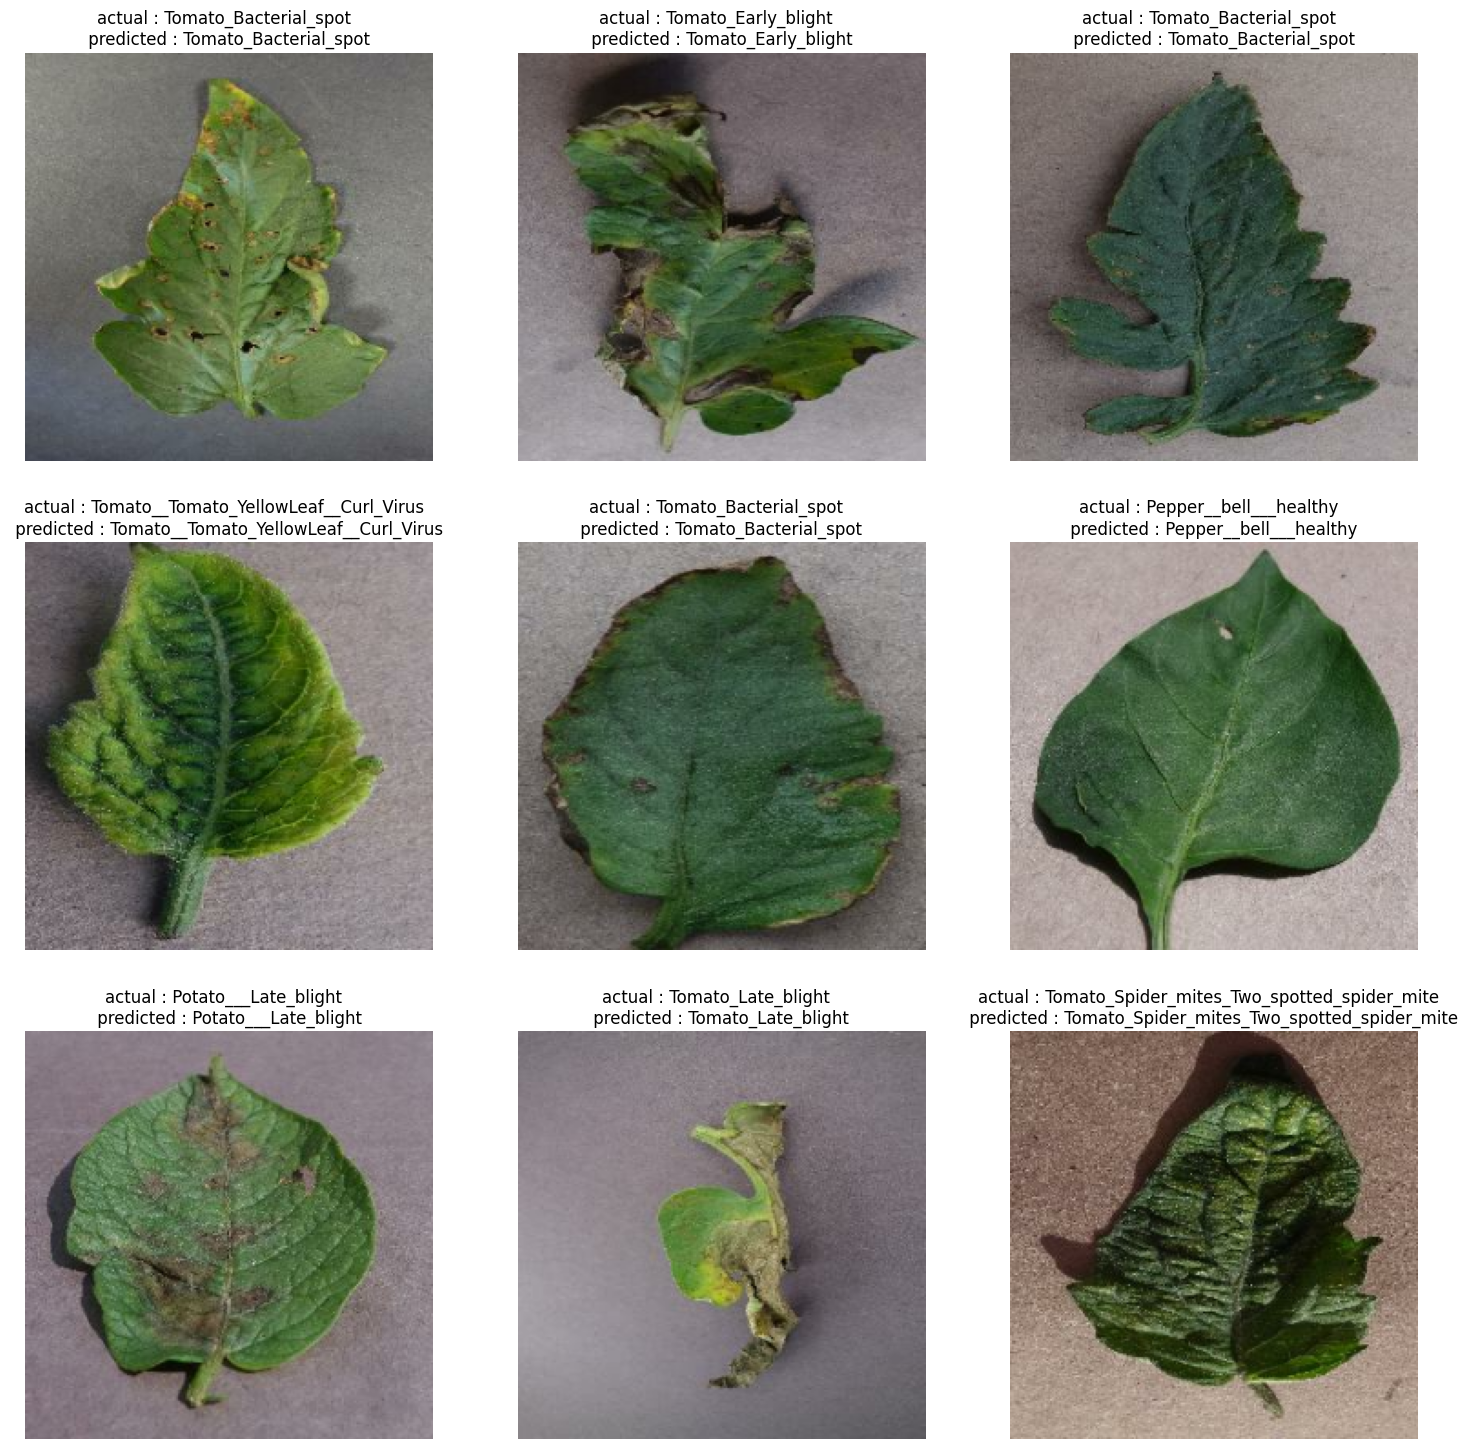

In [31]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1) : # take the first patch
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i].numpy().astype('uint32'))
    plt.axis('off')
    actual = classes[labels[i]]
    predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
    plt.title(f"actual : {actual}  \n predicted : {predict} ")

In [32]:
model.save('/content/plant_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
